# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/master/files/country_music.jpeg "Great image choice, Sune")

Today, we will use network science and Wikipedia to learn about the relationships of **[Country Music Performers](https://en.wikipedia.org/wiki/List_of_country_music_performers)**. 

To create the network, we will download the Wikipedia pages for all people in the list. Next, we create the network of the pages that link to each other. We can do this because wikipedia pages link to one another. So [Zach Bryan](https://en.wikipedia.org/wiki/Zach_Bryan) links to [Kacey Musgraves](https://en.wikipedia.org/wiki/Kacey_Musgraves), for example (it really does). You will note that the country music list includes performers that we don't typically think of as country musicians (e.g. [Bon Jovi](https://en.wikipedia.org/wiki/Bon_Jovi) or [Mark Knopfler](https://en.wikipedia.org/wiki/Mark_Knopfler), but we'll just roll with it and be open minded).

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to extract information from the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions.
* Download and store (for later use) all the performer-pages from Wikipedia.
* Extract all the internal wikipedia-links that connect the performers on Wikipedia.
* Generate the network of performers on wikipedia.
* Calculate some simple network statistics.
* Create a simple plot

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us. Up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links (links between wiki-pages). And for that we need regular expressions.

<div class="alert alert-block alert-info">
The recipe below is what I told the class to do before LLMs. If you want to try to learn about regular expressions on your own, that's what you need to do. <b>BUT!</b> You don't have to. <b>For this part, it's OK to use an LLM to help you as much as you possibly can.</b> The reason I'm saying this is that I don't think having an intimate knowledge of regular expressions is important for the content of this class.
</div>
<div class="alert alert-block alert-info">
That said, <b>using an LLM means that you have to do extra checking and testing</b>. Make sure that the code you get from your LLM actually does what you asked it to do by going through some examples and manually checking (use a real wiki page or the test-text below). If your LLM hallucinated the wrong answer and you still use the data that comes out, it will count negatively in our evaluations.
</div>

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples. 
> * (**Experiment 2022**: An alternative to reading. If you love videos more than reading, you can also check out [this YouTube explainer video](https://www.youtube.com/watch?v=rhzKDrUiJVk) instead of going through the tutorial above -- it's a friendly looking young man called Kyle who goes through RegExps from his bedroom. I haven't watched the whole thing ... since I personally don't like video explainers ... but it has many views + thumbs up.)
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Now we can go on to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/John_McCain). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2022/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [1]:
import re

file = open("Week 4 Resources/testtext.txt", "r")
text = file.read()
file.close()

pat = "\d\d\d\d"

matches = re.findall(pat, text)
print(matches)

pat2 = "super\w*"
matches2 = re.findall(pat2, text)
print(matches2)

['1234', '9999', '2345']
['superpolaroid', 'supertaxidermy', 'superbeer']


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\w'
C:\Users\musti\AppData\Local\Temp\ipykernel_27548\2150626059.py:7: SyntaxWarning: invalid escape sequence '\d'
  pat = "\d\d\d\d"
C:\Users\musti\AppData\Local\Temp\ipykernel_27548\2150626059.py:12: SyntaxWarning: invalid escape sequence '\w'
  pat2 = "super\w*"


---

# Part 1: Download the Wikipedia pages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). I've included it below for your covenience.

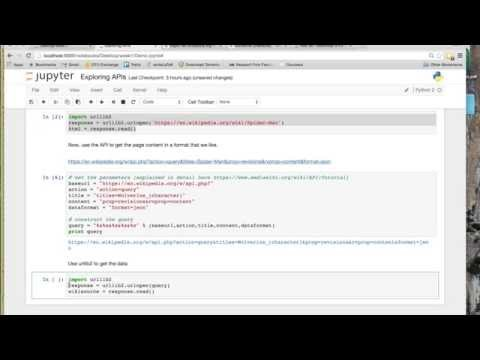

In [139]:
from IPython.display import YouTubeVideo
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

Now, it's time to go and get the names of all the wiki pages you'll need for your analysis. Those will serve as the nodes in our network. 

*Exercise*
> * Go to the page https://en.wikipedia.org/wiki/List_of_country_music_performers and extract all of the links using your regular expressions from above.
>   * Hint: To make this easy, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names.

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

#### A note to the perfectionists out there
The files contain names and corresponding wiki-link, but pages can be missing or redirected. If you encounter re-directs, you can follow the redirect link and see if you can recover a page that's not already in your database.  (But you do not have to do that either - it's fine to just skip ... many new issues can arise if you try to follow the redirects).

#### Back to our regularly scheduled programming

With the list from the exercise above, you now have all of the nodes in the network.

*Exercise*

> * Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers. 
>   - Hint 0: Make sure you read the [Wiki API pages](https://www.mediawiki.org/wiki/API:Main_page) to ensure that your download the cleanest possible version of the page (the wikitext). [This link](https://stackoverflow.com/questions/55779015/get-wikitext-from-wikipedia-api) may be helpful.
>   - Hint 1: You may want to save the pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per character, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
>   - Hint 2: If you now have a directory with all those files, you can use [`os.listdir()`](https://www.geeksforgeeks.org/python-os-listdir-method/) to list all the files in that directory within Python and iterate over the files if you need to.
>   - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

<div class="alert alert-block alert-info">
Again, it's OK to use an LLM here.
</div>

In [4]:
from urllib.request import urlopen
import json
import os

response = urlopen('https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&format=json&titles=List_of_country_music_performers&rvslots=main')
html = response.read()

data = json.loads(html)
page = data['query']['pages']['328877']['revisions'][0]['slots']['main']['*']
folder = os.makedirs("country_music_performers", exist_ok=True)
file = open("country_music_performers/country_music_performers.txt", "w")
file.write(page)
file.close()



In [ ]:
page = data['query']['pages']['328877']['revisions'][0]['slots']['main']['*']
print(data['query']['pages']['328877']['revisions'][0]['slots']['main']['*'])


In [3]:

from urllib.parse import quote
from urllib.request import urlopen
import json
import os

artists = []
onlyArtists = []
for line in page.split("\n"):
    if line.startswith("*"):
        onlyArtists.append(line)
onlyArtists = "\n".join(onlyArtists)
pattern = "\[\[([^\[\]|]+)(?:\|[^\[\]]+)?\]\]"
matches = re.findall(pattern, onlyArtists)
# matches = [match.replace(" ", "_") for match in matches]
print(matches)
response = 'https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&format=json&titles={s}&rvslots=main'
for match in matches:
    match = quote(match)
    newresponse = urlopen(response.format(s=match))
    html = newresponse.read()
    data = json.loads(html)
    page = data['query']['pages'][list(data['query']['pages'].keys())[0]]['revisions'][0]['slots']['main']['*']
    #do redirect        
    match = match.replace("/", "_")
    with open("country_music_performers/" + match + ".txt", "w",encoding="utf-8") as file:
        file.write(page)
    



<>:7: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\['
C:\Users\musti\AppData\Local\Temp\ipykernel_18088\3454274199.py:7: SyntaxWarning: invalid escape sequence '\['
  pattern = "\[\[([^\[\]|]+)(?:\|[^\[\]]+)?\]\]"
C:\Users\musti\AppData\Local\Temp\ipykernel_18088\3454274199.py:7: SyntaxWarning: invalid escape sequence '\['
  pattern = "\[\[([^\[\]|]+)(?:\|[^\[\]]+)?\]\]"


NameError: name 're' is not defined

---

# Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the country performers. 

The nodes in the network will be all the performers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

The overall plan of attack for this is the following: 
* Take the pages you have downloaded for each performer. 
* Each page corresponds to a performer, which is a node in your network. 
* Find all the hyperlinks in a performers page that link to another node of the network (e.g. an other perfomer). 
* There are many ways to do this, but below, I've tried to break it down into natural steps. 


*Exercise*: Build the network of Country Performers 

> Now we can build the network. Here are the instructions.
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
>   - Start by making a single page work. Do some debugging to make sure it's actually working.
>   - Then slowly build the loops over performers/pages to take your little operation to industrial scale
>   - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
> * For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.org/documentation/stable/reference/classes/digraph.html) to store the network.
> * Store the `length of the content` as an attribute of the node (i.e. count the number of *words* you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.
> * When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then *discard* those disconnected nodes from the network.
> * Finally, extract the largest component - it will make our work with visualisations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 2k nodes and around 18k edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
>     - *Note 3*: Further analysis is done with the largest component.

Take a moment to think about what you have just accomplished! Using simple tools, you've managed to build a complex network by crawling data from wikipedia. This means that you are a powerful hacker. Congratulations.

<div class="alert alert-block alert-info">
If it's helpful to you, it's OK to use an LLM here.
</div>


In [27]:
files = os.listdir("country_music_performers")
files.remove("country_music_performers.txt")

num_of_redirects = 0
for filename in os.listdir("country_music_performers"):
    with open("country_music_performers/" + filename, "r",encoding='cp1252',errors="ignore") as file:
        file = file.read()
    if "#REDIRECT" in file:
        num_of_redirects += 1
print(num_of_redirects)



86


In [16]:
import os
import re
from urllib.parse import quote
from concurrent.futures import ThreadPoolExecutor
from itertools import count

# Read the list of performers
allSingersPage = ""
with open("country_music_performers/country_music_performers.txt", "r") as file:
    allSingersPage = file.read()

# Extract only artist lines and links using regular expressions
onlyArtists = [line for line in allSingersPage.split("\n") if line.startswith("*")]

# Extract links in the form of [[Link]] or [[Link|display]] using a precompiled pattern
pattern = re.compile(r"\[\[([^\[\]|]+)(?:\|[^\[\]]+)?\]\]")
All_Links = set(pattern.findall("\n".join(onlyArtists)))  # Convert to set for faster lookups

# List all files except the main performers file
files = os.listdir("country_music_performers")
files.remove("country_music_performers.txt")

edges = []
progress_counter = count(1)  # Thread-safe counter for progress

# Function to process a single file
def process_file(filename):
    file_edges = []
    try:
        with open("country_music_performers/" + filename, "r", encoding="utf-8", errors="ignore") as file:
            file_content = file.read()
        for link in All_Links:
            # If the link is found in the current file
            if re.search(r"\[\[" + re.escape(link) + r"\]\]", file_content):
                sanitized_link = link.replace("/", "_")
                sanitized_filename = filename.replace(".txt", "")
                file_edges.append((sanitized_filename, quote(sanitized_link)))
    except Exception as e:
        print(f"Error processing {filename}: {e}")
    
    # Print progress every 100 files
    progress = next(progress_counter)
    if progress % 100 == 0 or progress == len(files):
        print(f"Processed {progress} of {len(files)} files ({(progress / len(files)) * 100:.2f}%)")
    
    return file_edges

# Use ThreadPoolExecutor to parallelize the process (better for I/O-bound tasks)
with ThreadPoolExecutor(max_workers=4) as executor:  # Adjust max_workers based on your system
    results = list(executor.map(process_file, files))

# Combine all edges from the parallel execution
for result in results:
    edges.extend(result)

# Print final result
print(f"Finished processing {len(files)} files.")
print(f"Total edges found: {len(edges)}")
if len(edges) > 10:
    print(f"First 10 edges: {edges[:10]}")


Processed 100 of 2097 files (4.77%)
Processed 200 of 2097 files (9.54%)
Processed 300 of 2097 files (14.31%)
Processed 400 of 2097 files (19.07%)
Processed 500 of 2097 files (23.84%)
Processed 600 of 2097 files (28.61%)
Processed 700 of 2097 files (33.38%)
Processed 800 of 2097 files (38.15%)
Processed 900 of 2097 files (42.92%)
Processed 1000 of 2097 files (47.69%)
Processed 1100 of 2097 files (52.46%)
Processed 1200 of 2097 files (57.22%)
Processed 1300 of 2097 files (61.99%)
Processed 1400 of 2097 files (66.76%)
Processed 1500 of 2097 files (71.53%)
Processed 1600 of 2097 files (76.30%)
Processed 1700 of 2097 files (81.07%)
Processed 1800 of 2097 files (85.84%)
Processed 1900 of 2097 files (90.61%)
Processed 2000 of 2097 files (95.37%)
Processed 2097 of 2097 files (100.00%)
Finished processing 2097 files.
Total edges found: 16426
First 10 edges: [('4%20Runner', 'Keith%20Urban'), ('4%20Runner', 'Chad%20Brock'), ('4%20Runner', 'Loretta%20Lynn'), ('4%20Runner', 'Reba%20McEntire'), ('4%

In [2]:
import pickle
import os
import sys

# Check if the pickle file exists
if os.path.isfile("Week 4 Resources/edges.pkl"):
    # Load existing data from the pickle file
    print("edges are there")
    sys.exit()
else:
    existing_edges = []

# Combine old and new edges
all_edges = existing_edges + edges

# Save the combined list back to the pickle file
with open("Week 4 Resources/edges.pkl", "wb") as pklfile:
    pickle.dump(all_edges, pklfile)

print(f"Edges saved. Total edges in edges.pkl: {len(all_edges)}")


edges are there


SystemExit: 

C:\Users\musti\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [20]:
# Check if the pickle file exists
pickle_file = "edges.pkl"
if os.path.isfile(pickle_file):
    # Load the data from the pickle file
    with open(pickle_file, "rb") as pklfile:
        edges = pickle.load(pklfile)

    # Print the loaded data
    print(f"Loaded {len(edges)} edges from {pickle_file}")
    for edge in edges[:10]:  # Print the first 10 edges as an example
        print(edge)
else:
    print(f"{pickle_file} does not exist.")

Loaded 16426 edges from edges.pkl
('4%20Runner', 'Keith%20Urban')
('4%20Runner', 'Chad%20Brock')
('4%20Runner', 'Loretta%20Lynn')
('4%20Runner', 'Reba%20McEntire')
('4%20Runner', 'Chely%20Wright')
('4%20Runner', 'Craig%20Morgan')
('4%20Runner', 'Amie%20Comeaux')
('4%20Runner', 'The%20Jenkins')
('4%20Runner', 'Diamond%20Rio')
('4%20Runner', 'Tanya%20Tucker')


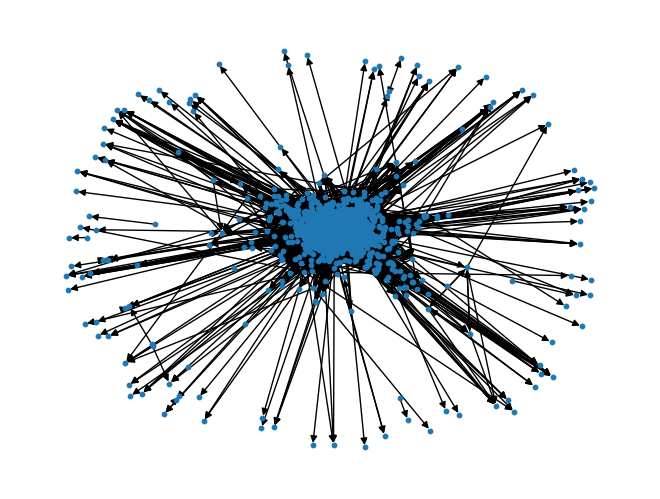

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()
graph.add_edges_from(edges)

nx.draw(graph, with_labels=False, node_size=10)



*Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)
> * Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the out-degree distribution to a *random network* with the same number of nodes and links.
>     * Compare the in-degree distribution to a *scale-free* network with the same number of nodes.
> * Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
> * What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do everything yourself. This is a part where you learn something by writing the code.
</div>

Number of nodes: 1897
Number of edges: 16426

Maximum in-degree: 202
Maximum out-degree: 91
Minimum in-degree: 0
Minimum out-degree: 0
maximum degree: 248 and minimum degree: 1

Top 5 highest degree nodes:  ['George%20Jones', 'Willie%20Nelson', 'Merle%20Haggard', 'Johnny%20Cash', 'Dolly%20Parton']
Top 5 highest in-degree nodes:  ['George%20Jones', 'Willie%20Nelson', 'Merle%20Haggard', 'Elvis%20Presley', 'Johnny%20Cash', 'Dolly%20Parton']
Top 5 highest out-degree nodes:  ['Patty%20Loveless', 'Vince%20Gill', 'Randy%20Travis', 'Pam%20Tillis', 'Hillary%20Lindsey']

Top 10 largest pages:  ['Beyonc%C3%A9.txt', 'Bob%20Dylan.txt', 'Carrie%20Underwood.txt', 'Demi%20Lovato.txt', 'Ed%20Sheeran.txt', 'Elvis%20Presley.txt', 'Justin%20Bieber.txt', 'Justin%20Timberlake.txt', 'Miley%20Cyrus.txt', 'Taylor%20Swift.txt']


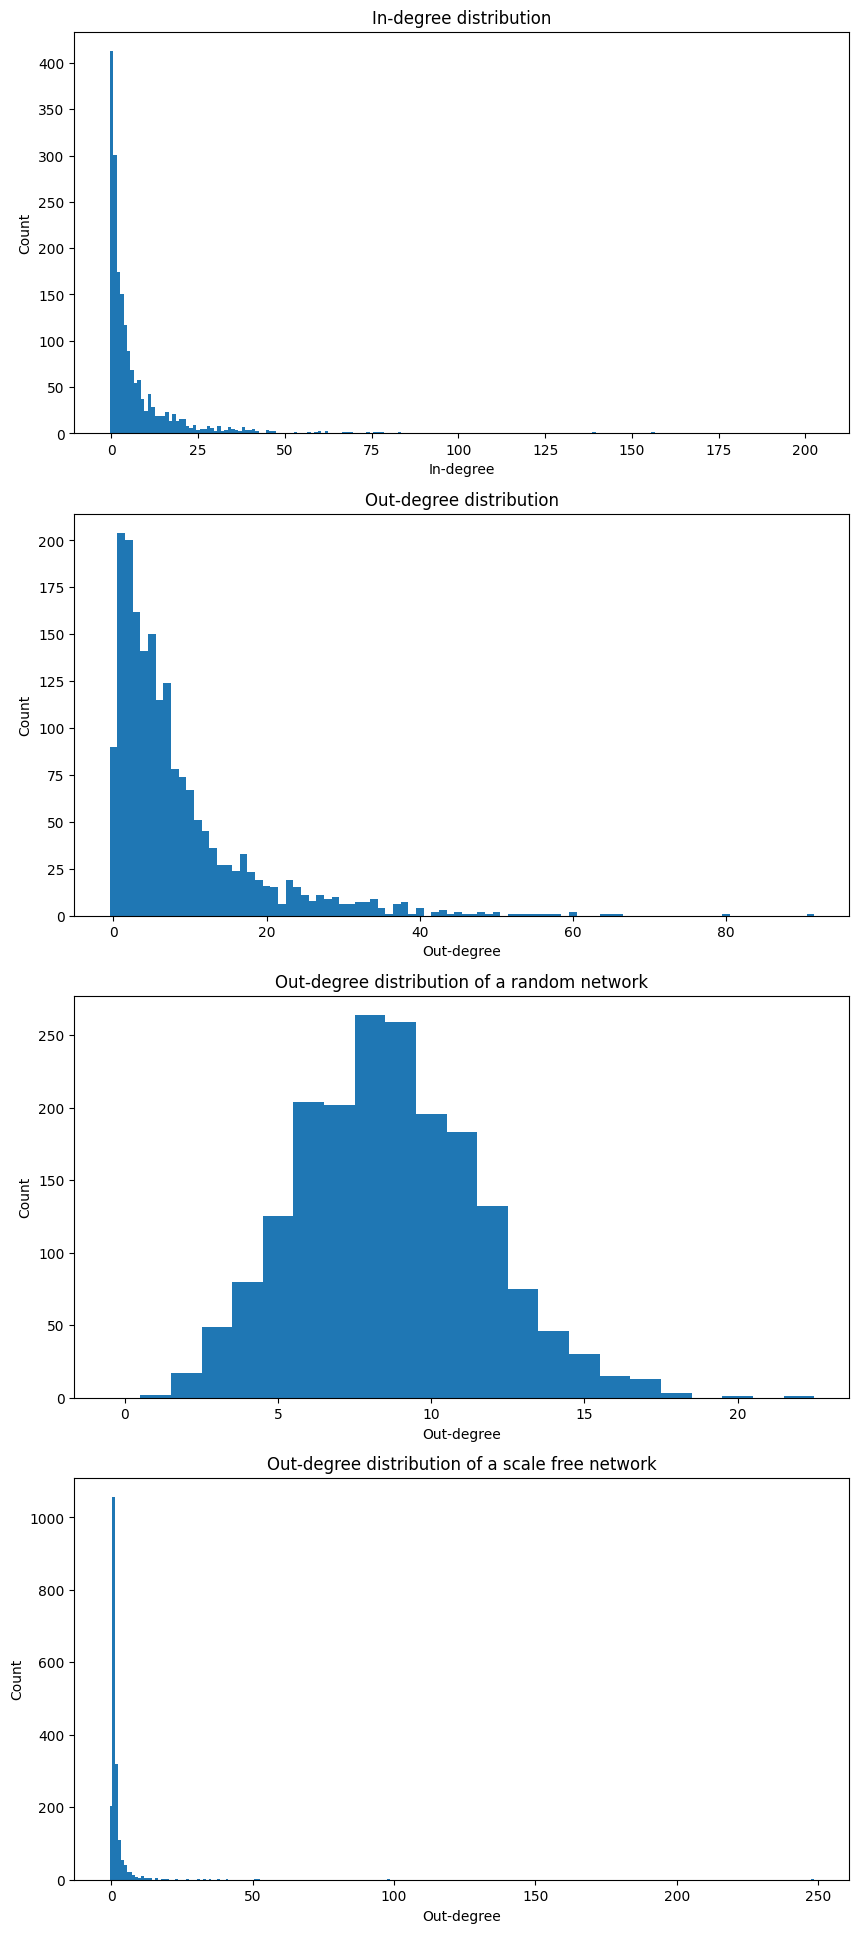

In [71]:
import numpy as np

n = graph.number_of_nodes()
m = graph.number_of_edges()

in_degrees = dict(graph.in_degree()).values()
out_degrees = dict(graph.out_degree()).values()
d = graph.degree()

max_in_degree, max_out_degree = max(in_degrees), max(out_degrees)
min_in_degree, min_out_degree = min(in_degrees), min(out_degrees)
max_d, min_d = max(dict(d).values()), min(dict(d).values())

print(f"Number of nodes: {n}")
print(f"Number of edges: {m}")
print()
print(f"Maximum in-degree: {max_in_degree}")
print(f"Maximum out-degree: {max_out_degree}")
print(f"Minimum in-degree: {min_in_degree}")
print(f"Minimum out-degree: {min_out_degree}")
print(f"maximum degree: {max_d} and minimum degree: {min_d}")

hist = np.histogram(list(in_degrees), bins=range(0, max_in_degree + 2))
plt.figure(figsize=(10, 24))
subplot = plt.subplot(411)
plt.bar(hist[1][:-1], hist[0], width=1, align="center")
plt.title("In-degree distribution")
plt.xlabel("In-degree")
plt.ylabel("Count")

subplot = plt.subplot(412)
hist = np.histogram(list(out_degrees), bins=range(0, max_out_degree + 2))
plt.bar(hist[1][:-1], hist[0], width=1, align="center")
plt.title("Out-degree distribution")
plt.xlabel("Out-degree")
plt.ylabel("Count")

random_network = nx.erdos_renyi_graph(n, m / (n * (n - 1)), directed=True)
out_degrees_random = dict(random_network.out_degree()).values()
max_out_degree_random = max(out_degrees_random)
subplot = plt.subplot(413)
hist = np.histogram(list(out_degrees_random), bins=range(0, max_out_degree_random + 2))
plt.bar(hist[1][:-1], hist[0], width=1, align="center")
plt.title("Out-degree distribution of a random network")
plt.xlabel("Out-degree")
plt.ylabel("Count")

scale_free_network = nx.scale_free_graph(n)
out_degrees_scale_free = dict(scale_free_network.out_degree()).values()
max_out_degree_scale_free = max(out_degrees_scale_free)
subplot = plt.subplot(414)
hist = np.histogram(list(out_degrees_scale_free), bins=range(0, max_out_degree_scale_free + 2))
plt.bar(hist[1][:-1], hist[0], width=1, align="center")
plt.title("Out-degree distribution of a scale free network")
plt.xlabel("Out-degree")
plt.ylabel("Count")



#top 5 highest degree nodes
dicttop5 = dict(d)
top5_d = list(dicttop5.values())
top5_d.sort(reverse=True)
top5_d = top5_d[:5]
top5_d = [k for k, v in dicttop5.items() if v in top5_d]
print()
print("Top 5 highest degree nodes: ", top5_d) 
top5_din = list(in_degrees)
top5_din.sort(reverse=True)
top5_din = top5_din[:5]
top5_din = [k for k, v in dict(graph.in_degree()).items() if v in top5_din]
print("Top 5 highest in-degree nodes: ", top5_din)
top5_dout = list(out_degrees)
top5_dout.sort(reverse=True)
top5_dout = top5_dout[:5]
top5_dout = [k for k, v in dict(graph.out_degree()).items() if v in top5_dout]
print("Top 5 highest out-degree nodes: ", top5_dout)

print()
# Largest pages
pageLength = {}
for file in os.listdir("country_music_performers"):
    with open("country_music_performers/" + file, "r", encoding="utf-8", errors="ignore") as f:
        content = f.read()
        pageLength[file] = len(content)

sortedPages = list(pageLength.values())
sortedPages.sort(reverse=True)
sortedPages = sortedPages[:10]
sortedPages = [k for k, v in pageLength.items() if v in sortedPages]
print("Top 10 largest pages: ", sortedPages)





# Part 3: Visualizing the networks

*Exercise:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises.
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Set up your plot so that node-size depends on the node *degree*.
>   * Make the node color depend on the `length of content` attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

<div class="alert alert-block alert-info">
For this exercise, I hope you'll do almost everything yourself. But it's OK to use an LLM for help with the coloring.
</div>

In [76]:
undirected_graph = graph.to_undirected()


And don't worry if your network looks like a hairball (a.k.a a *ridiculogram*) for now, we'll dig deeper with visualization next time.

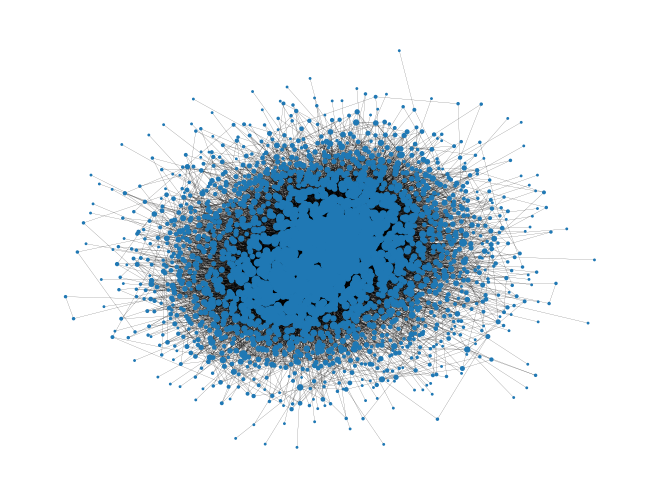

In [77]:
nx.draw_kamada_kawai(undirected_graph, with_labels=False, width=0.1,
                     nodelist=list(dict(undirected_graph.degree)),
                     node_size=[dict(undirected_graph.degree)[k]*1.1 for k in dict(undirected_graph.degree)])